### IMPORT DEPENDENCIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
cancer_df = pd.read_csv(r"C:\Users\Dickson\Desktop\TA( Ai Comm Africa)\4. Support vector Machine\Breast cancer data.csv")

In [5]:
cancer_df

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0
...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0
565,20.13,28.25,131.20,1261.0,0.09780,0
566,16.60,28.08,108.30,858.1,0.08455,0
567,20.60,29.33,140.10,1265.0,0.11780,0


### Data Preprocessing

In [6]:
cancer_df. shape

(569, 6)

In [8]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


In [9]:
cancer_df.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,1.000000


### Standardize the Scaler

In [10]:
from sklearn.preprocessing import StandardScaler


In [17]:
# Separate the column we don't want to scale
diagnosis_column = cancer_df['diagnosis']

# Select the features you want to scale (excluding 'diagnosis')
features_to_scale = cancer_df.drop(columns=['diagnosis'])

In [19]:
# Initialize StandardScaler
scaler = StandardScaler()

In [23]:
# Scale the features
scaled_features = scaler.fit_transform(features_to_scale)


In [30]:
# Create a DataFrame to view the scaled features
scaled_df = pd.DataFrame(scaled_features, columns=features_to_scale.columns)


In [31]:
# Combine the scaled features with the unscaled 'diagnosis' column
final_df = pd.concat([scaled_df, diagnosis_column], axis=1)


In [34]:
final_df

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,1.097064,-2.073335,1.269934,0.984375,1.568466,0
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,0
2,1.579888,0.456187,1.566503,1.558884,0.942210,0
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,0
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0
...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,2.343856,1.041842,0
565,1.704854,2.085134,1.615931,1.723842,0.102458,0
566,0.702284,2.045574,0.672676,0.577953,-0.840484,0
567,1.838341,2.336457,1.982524,1.735218,1.525767,0


After scaling, the mean of each feature is close to 0, and the standard deviation is 1.
This normalization ensures that features with large values do not dominate the model's learning process.

## Split Data into train and test

In [39]:
from sklearn.model_selection import train_test_split

In [42]:
# Separate features (X) and target (y)
X = final_df.drop(columns=['diagnosis'])
y = final_df['diagnosis']

In [43]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


### Support Vector Machine

In [45]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

In [46]:
# Train an SVM model
svm_model = SVC(kernel='linear')  # Using linear kernel for simplicity
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

In [47]:
# Make predictions on the test set
y_pred = svm_model.predict(X_test)

In [48]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[ 57   6]
 [  3 105]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.90      0.93        63
           1       0.95      0.97      0.96       108

    accuracy                           0.95       171
   macro avg       0.95      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171



In [51]:
cm = confusion_matrix(y_test, y_pred)


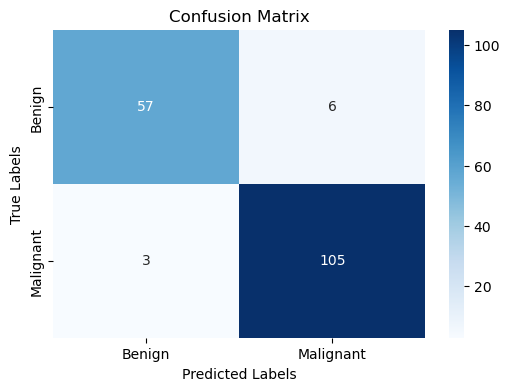

In [52]:
# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Benign", "Malignant"], yticklabels=["Benign", "Malignant"])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

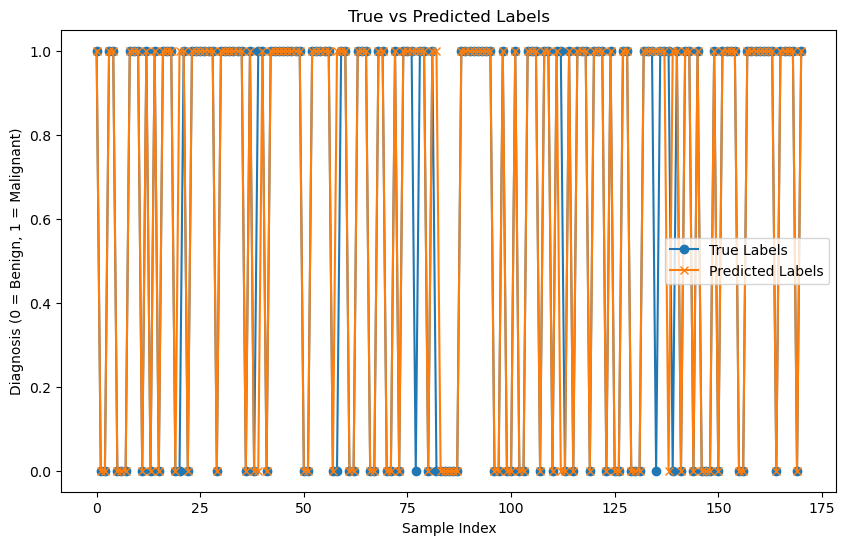

In [53]:
# True vs Predicted plot
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='True Labels', marker='o')
plt.plot(y_pred, label='Predicted Labels', marker='x')
plt.xlabel('Sample Index')
plt.ylabel('Diagnosis (0 = Benign, 1 = Malignant)')
plt.title('True vs Predicted Labels')
plt.legend()
plt.show()